<a href="https://colab.research.google.com/github/LegendSeyi/Analysing-Electricity-Usage-Pattern-In-Rural-Areas-In-Nigeria-Using-Unsupervised-ML/blob/main/Copy_of_Analysing_Electricity_Usage_Patterning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysing Electricity Usage Pattern In Rural Areas In Nigeria Using Unsupervised ML

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
url = 'https://raw.githubusercontent.com/LegendSeyi/Dataset/refs/heads/main/nigeria_rural_electricity_usage.csv'

pd.set_option('display.max_columns', None)
data = pd.read_csv(url, encoding= 'utf-8')

In [45]:
data

,timestamp,state,community,household_id,energy_kWh,source,weather,appliance_usage_level,avg_voltage,blackout_hours
0,2025-03-01,Lagos,Agbowa,H5264,7.99,Grid,Rainy,Medium,210.3,3.5
1,2025-03-20,Oyo,Igboora,H4998,9.08,Grid,Rainy,Medium,205.6,5.1
2,2025-01-05,Lagos,Epe,H6356,7.25,Grid,Sunny,Low,180.5,2.9
3,2025-01-15,Ogun,Ijebu,H6182,3.70,Solar,Sunny,Low,244.3,3.5
4,2025-03-27,Lagos,Agbowa,H7931,2.46,Grid,Sunny,Medium,192.0,4.8
...,...,...,...,...,...,...,...,...,...,...
1105,2025-03-06,Ogun,Ifo,H8076,2.60,Solar,Sunny,High,203.7,1.0
1106,2025-02-06,Lagos,Epe,H1354,3.71,Grid,Cloudy,Medium,216.4,0.5
1107,2025-02-24,Lagos,Badagry,H4245,9.15,Grid,Cloudy,Medium,207.0,2.5
1108,2025-01-24,Oyo,Ogbomoso,H2784,1.05,Generator,Rainy,High,212.9,5.2


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              1110 non-null   object 
 1   state                  1110 non-null   object 
 2   community              1110 non-null   object 
 3   household_id           1110 non-null   object 
 4   energy_kWh             1110 non-null   float64
 5   source                 1110 non-null   object 
 6   weather                1110 non-null   object 
 7   appliance_usage_level  1110 non-null   object 
 8   avg_voltage            1110 non-null   float64
 9   blackout_hours         1110 non-null   float64
dtypes: float64(3), object(7)
memory usage: 86.8+ KB


In [47]:
data.head()

,timestamp,state,community,household_id,energy_kWh,source,weather,appliance_usage_level,avg_voltage,blackout_hours
0,2025-03-01,Lagos,Agbowa,H5264,7.99,Grid,Rainy,Medium,210.3,3.5
1,2025-03-20,Oyo,Igboora,H4998,9.08,Grid,Rainy,Medium,205.6,5.1
2,2025-01-05,Lagos,Epe,H6356,7.25,Grid,Sunny,Low,180.5,2.9
3,2025-01-15,Ogun,Ijebu,H6182,3.70,Solar,Sunny,Low,244.3,3.5
4,2025-03-27,Lagos,Agbowa,H7931,2.46,Grid,Sunny,Medium,192.0,4.8


##DATA CLEANING

In [48]:
data.shape

(1110, 10)

In [49]:
data.columns

Index(['timestamp', 'state', 'community', 'household_id', 'energy_kWh',
       'source', 'weather', 'appliance_usage_level', 'avg_voltage',
       'blackout_hours'],
      dtype='object')

In [50]:
data.nunique()

,0
timestamp,90
state,3
community,12
household_id,1050
energy_kWh,662
source,3
weather,3
appliance_usage_level,3
avg_voltage,577
blackout_hours,94


In [51]:
data['household_id'].unique()

array(['H5264', 'H4998', 'H6356', ..., 'H4245', 'H2784', 'H2402'],
      dtype=object)

Removing the "Houshold_id" column,it is not useful for this project

In [52]:
data['household_id'].count()

np.int64(1110)

In [53]:
data.drop('household_id', axis=1, inplace=True)

In [54]:
data.head()

,timestamp,state,community,energy_kWh,source,weather,appliance_usage_level,avg_voltage,blackout_hours
0,2025-03-01,Lagos,Agbowa,7.99,Grid,Rainy,Medium,210.3,3.5
1,2025-03-20,Oyo,Igboora,9.08,Grid,Rainy,Medium,205.6,5.1
2,2025-01-05,Lagos,Epe,7.25,Grid,Sunny,Low,180.5,2.9
3,2025-01-15,Ogun,Ijebu,3.70,Solar,Sunny,Low,244.3,3.5
4,2025-03-27,Lagos,Agbowa,2.46,Grid,Sunny,Medium,192.0,4.8


#### timestamp column

In [55]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [56]:
data['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1110 entries, 0 to 1109
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
1110 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.8 KB


##### sorting the data according to the timestamp in ascending order

In [57]:
data_sorted = data.sort_values(by='timestamp', ascending=True)

In [58]:
data_sorted

,timestamp,state,community,energy_kWh,source,weather,appliance_usage_level,avg_voltage,blackout_hours
125,2025-01-01,Oyo,Ogbomoso,3.58,Solar,Rainy,Low,208.3,7.3
1078,2025-01-01,Ogun,Sagamu,6.52,Solar,Cloudy,Medium,207.7,0.7
1068,2025-01-01,Oyo,Oyo Town,6.13,Grid,Cloudy,Low,171.1,7.2
819,2025-01-01,Ogun,Sagamu,5.24,Generator,Sunny,High,215.9,5.1
894,2025-01-01,Ogun,Ijebu,3.65,Generator,Sunny,Medium,193.2,3.5
...,...,...,...,...,...,...,...,...,...
627,2025-03-31,Oyo,Iseyin,2.82,Grid,Sunny,Low,193.6,7.8
184,2025-03-31,Lagos,Badagry,4.21,Grid,Cloudy,Medium,219.9,2.9
639,2025-03-31,Ogun,Ijebu,4.56,Generator,Rainy,Medium,190.9,1.8
396,2025-03-31,Ogun,Ifo,3.34,Grid,Sunny,Low,204.5,4.3


In [59]:
data_sorted['timestamp'].nunique()

90

the data recollection spanned for 90 days in the year 2025

## State Column

In [60]:
data_sorted.state.unique()

array(['Oyo', 'Ogun', 'Lagos'], dtype=object)

data was collected from 3 states in Nigeria which are: OYO, OGUN, LAGOS

In [61]:
data_sorted.state.info()

<class 'pandas.core.series.Series'>
Index: 1110 entries, 125 to 322
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
1110 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


### Community Column

In [62]:
data_sorted.community.head()

,community
125,Ogbomoso
1078,Sagamu
1068,Oyo Town
819,Sagamu
894,Ijebu


In [63]:
data_sorted.community.nunique()

12

12 different community from the 3 states

In [64]:
state_community_counts = data_sorted.groupby('state')['community'].nunique()

In [65]:
state_community_counts

,community
state,
Lagos,4
Ogun,4
Oyo,4


4 communities in each states

In [66]:
data_sorted.loc[data_sorted['state'] == 'Lagos', 'community'].unique()

array(['Epe', 'Ikorodu', 'Badagry', 'Agbowa'], dtype=object)

Rural Communities under lagos are Epe, Ikorodu, Badagry, Agbowa

In [67]:
data_sorted.loc[data_sorted['state'] == 'Oyo', 'community'].unique()

array(['Ogbomoso', 'Oyo Town', 'Iseyin', 'Igboora'], dtype=object)

Rural Communities under Oyo are Ogbomoso, Oyo Town, Iseyin, Igboora

In [68]:
data_sorted.loc[data_sorted['state'] == 'Ogun', 'community'].unique()

array(['Sagamu', 'Ijebu', 'Ifo', 'Ayetoro'], dtype=object)

Rural Communities under Ogun are 'Sagamu', 'Ijebu', 'Ifo', 'Ayetoro

In [69]:
print(f'lagos data: {data_sorted.loc[data_sorted['state'] == 'Lagos', 'community'].count()}')

print(f'Oyo data: {data_sorted.loc[data_sorted['state'] == 'Oyo', 'community'].count()}')

print(f'Ogun data: {data_sorted.loc[data_sorted['state'] == 'Ogun', 'community'].count()}')

lagos data: 357
Oyo data: 375
Ogun data: 378


### energy_kWh column

In [70]:
data_sorted.energy_kWh.head()

,energy_kWh
125,3.58
1078,6.52
1068,6.13
819,5.24
894,3.65


In [71]:
data_sorted.energy_kWh.describe()

,energy_kWh
count,1110.000000
mean,5.519757
std,2.827698
min,0.600000
25%,3.322500
50%,5.010000
75%,7.250000
max,12.000000


In [72]:
data_sorted.energy_kWh.max()

12.0

### Source Column

In [73]:
data_sorted.source.unique()

array(['Solar', 'Grid', 'Generator'], dtype=object)

In [74]:
data_sorted.source.nunique()

3

In [75]:
data_sorted.head()

,timestamp,state,community,energy_kWh,source,weather,appliance_usage_level,avg_voltage,blackout_hours
125,2025-01-01,Oyo,Ogbomoso,3.58,Solar,Rainy,Low,208.3,7.3
1078,2025-01-01,Ogun,Sagamu,6.52,Solar,Cloudy,Medium,207.7,0.7
1068,2025-01-01,Oyo,Oyo Town,6.13,Grid,Cloudy,Low,171.1,7.2
819,2025-01-01,Ogun,Sagamu,5.24,Generator,Sunny,High,215.9,5.1
894,2025-01-01,Ogun,Ijebu,3.65,Generator,Sunny,Medium,193.2,3.5


Weather Column

In [76]:
print(data_sorted.weather.unique())
print(f'{data_sorted.weather.nunique()} different weather conditions')


['Rainy' 'Cloudy' 'Sunny']
3 different weather conditions


###AVERAGE VOLTAGE

In [77]:
df = data_sorted.copy()

In [78]:
df.head()

,timestamp,state,community,energy_kWh,source,weather,appliance_usage_level,avg_voltage,blackout_hours
125,2025-01-01,Oyo,Ogbomoso,3.58,Solar,Rainy,Low,208.3,7.3
1078,2025-01-01,Ogun,Sagamu,6.52,Solar,Cloudy,Medium,207.7,0.7
1068,2025-01-01,Oyo,Oyo Town,6.13,Grid,Cloudy,Low,171.1,7.2
819,2025-01-01,Ogun,Sagamu,5.24,Generator,Sunny,High,215.9,5.1
894,2025-01-01,Ogun,Ijebu,3.65,Generator,Sunny,Medium,193.2,3.5


In [79]:
df.appliance_usage_level.describe()

,appliance_usage_level
count,1110
unique,3
top,Low
freq,445


In [80]:
df.avg_voltage.describe()

,avg_voltage
count,1110.000000
mean,214.876306
std,19.324744
min,154.600000
25%,201.725000
50%,215.400000
75%,228.200000
max,278.000000


In [81]:
df.blackout_hours.describe()

,blackout_hours
count,1110.000000
mean,4.072793
std,1.991365
min,0.000000
25%,2.700000
50%,4.000000
75%,5.400000
max,10.200000


TEST TEST

EDA - EXPLORATORY DATA ANALYSIS

In [82]:
df.describe()

,timestamp,energy_kWh,avg_voltage,blackout_hours
count,1110,1110.000000,1110.000000,1110.000000
mean,2025-02-14 12:07:47.027026944,5.519757,214.876306,4.072793
min,2025-01-01 00:00:00,0.600000,154.600000,0.000000
25%,2025-01-22 00:00:00,3.322500,201.725000,2.700000
50%,2025-02-15 00:00:00,5.010000,215.400000,4.000000
75%,2025-03-09 00:00:00,7.250000,228.200000,5.400000
max,2025-03-31 00:00:00,12.000000,278.000000,10.200000
std,NaN,2.827698,19.324744,1.991365


<Axes: xlabel='source', ylabel='count'>

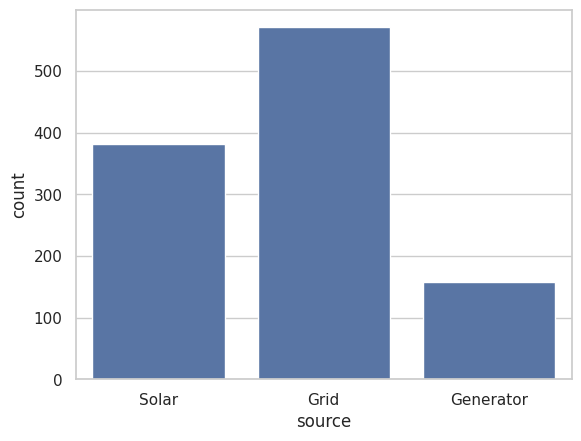

In [83]:
sns.countplot(x='source',data=df)

In [84]:
# HANDLE TIMESTAMP

if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    # Extract time features
    df["year"] = df["timestamp"].dt.year
    df["month"] = df["timestamp"].dt.month
    df["day"] = df["timestamp"].dt.day


In [85]:
# FEATURE ENGINEERING
# effective_usage_time = 24 - blackout_hours
# power = energy_kWh / effective_usage_time


df["effective_usage_time"] = 24 - df["blackout_hours"]

# Prevent division by zero
df["effective_usage_time"] = df["effective_usage_time"].replace(0, np.nan)

df["power"] = df["energy_kWh"] / df["effective_usage_time"]

In [86]:
# HANDLE MISSING VALUES

df = df.dropna()  # safest for clustering

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
timestamp                0
state                    0
community                0
energy_kWh               0
source                   0
weather                  0
appliance_usage_level    0
avg_voltage              0
blackout_hours           0
year                     0
month                    0
day                      0
effective_usage_time     0
power                    0
dtype: int64


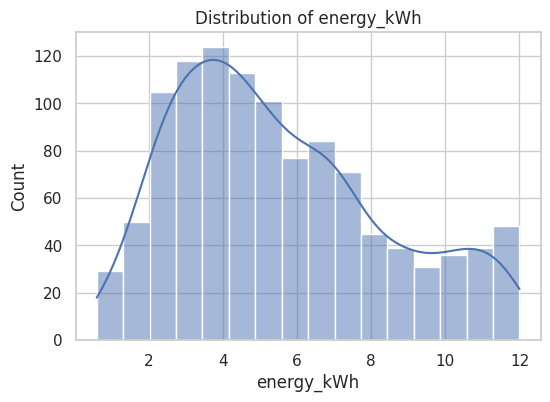

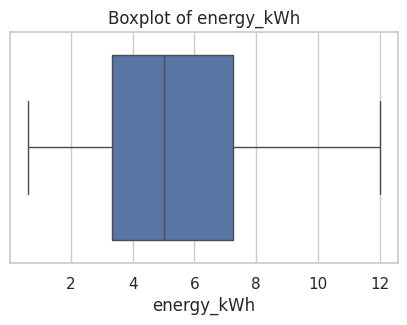

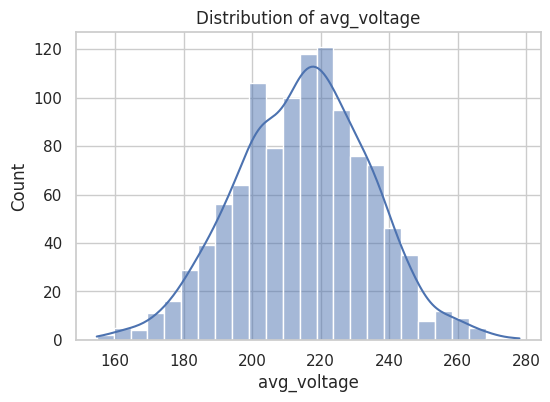

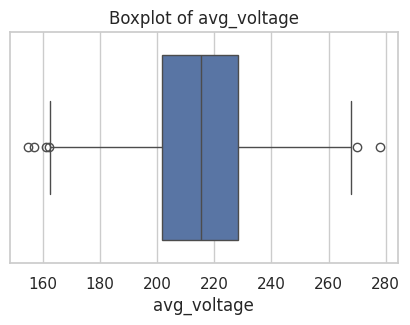

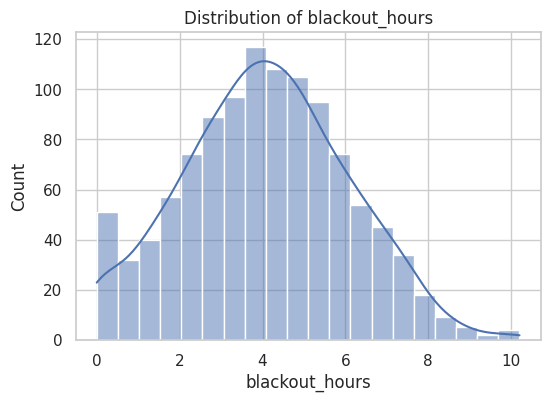

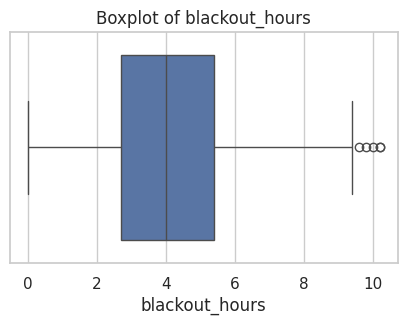

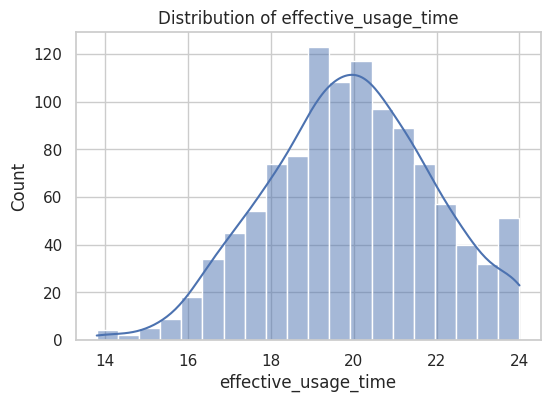

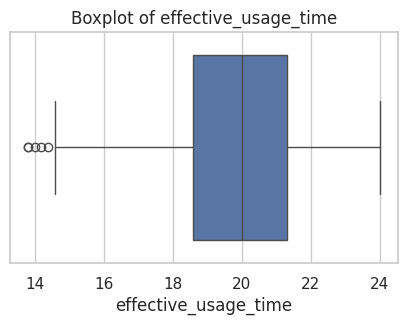

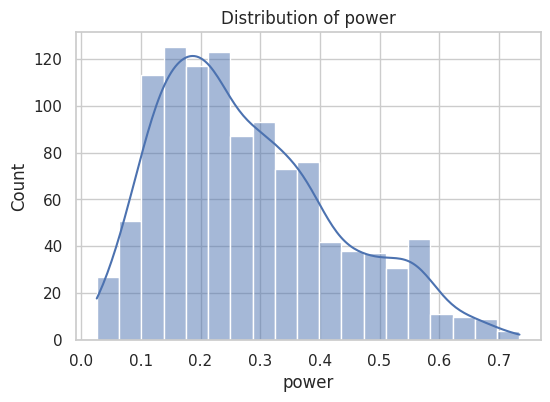

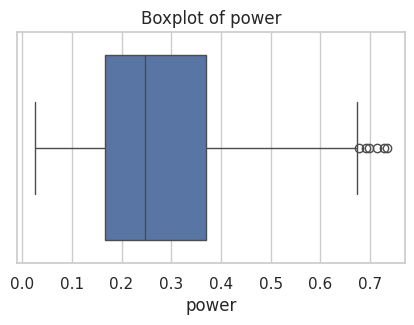

In [87]:
# UNIVARIATE ANALYSIS (NUMERIC)

numeric_cols = ["energy_kWh", "avg_voltage", "blackout_hours",
                "effective_usage_time", "power"]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

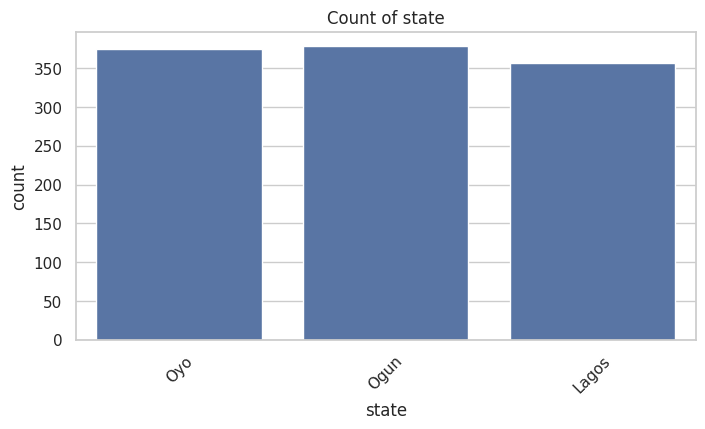

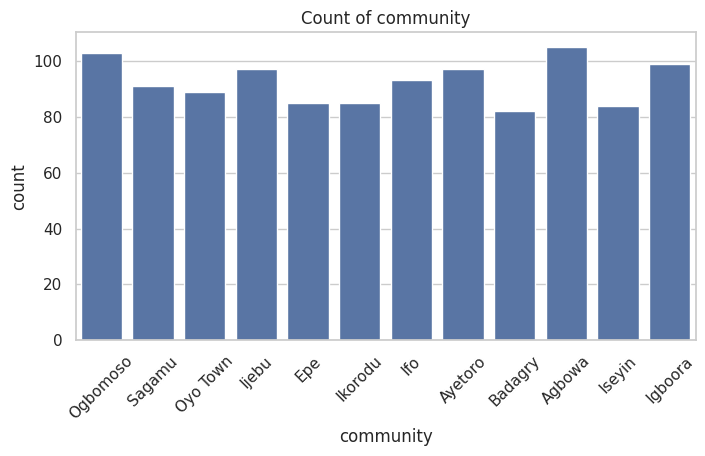

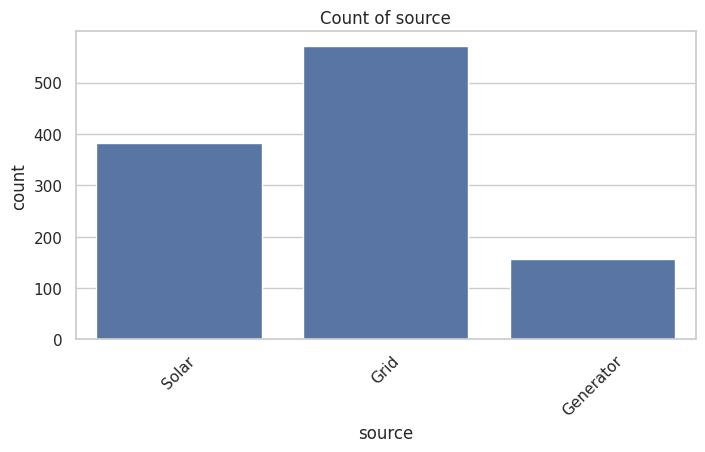

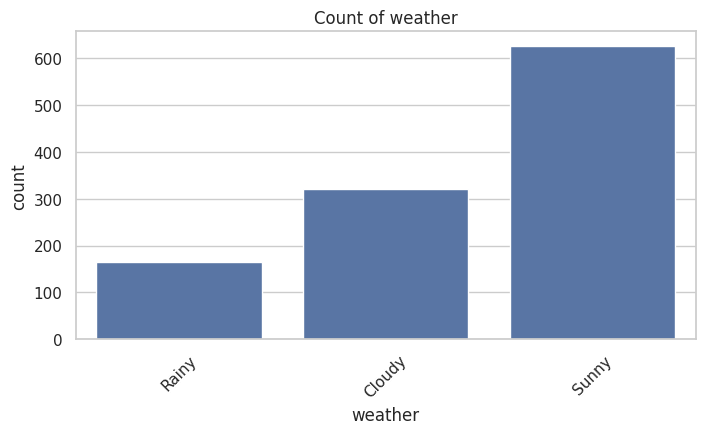

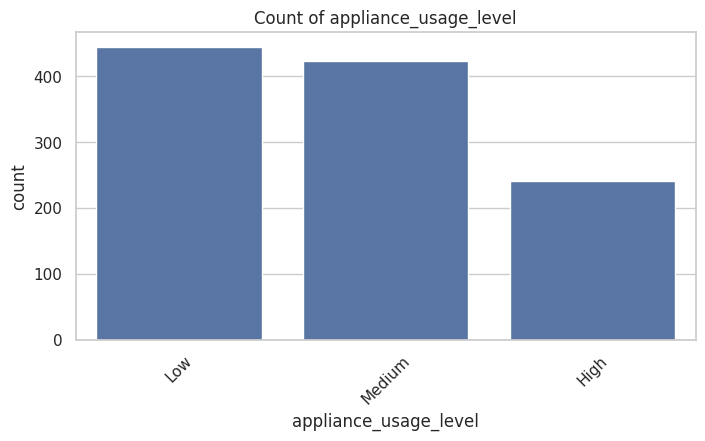

In [88]:
#  CATEGORICAL ANALYSIS

categorical_cols = ["state", "community", "source", "weather", "appliance_usage_level"]

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
        plt.title(f"Count of {col}")
        plt.show()

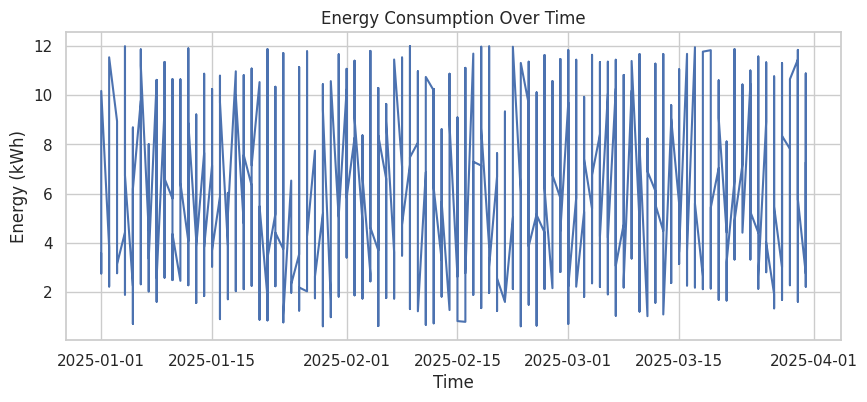

In [89]:
#  TIME SERIES EDA

if "timestamp" in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df["timestamp"], df["energy_kWh"])
    plt.title("Energy Consumption Over Time")
    plt.xlabel("Time")
    plt.ylabel("Energy (kWh)")
    plt.show()

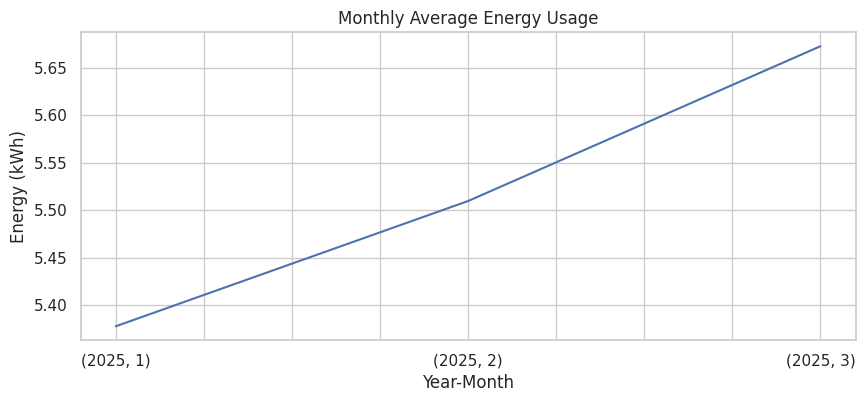

In [91]:
# Monthly usage
monthly_usage = df.groupby(["year", "month"])["energy_kWh"].mean()

plt.figure(figsize=(10, 4))
monthly_usage.plot()
plt.title("Monthly Average Energy Usage")
plt.xlabel("Year-Month")
plt.ylabel("Energy (kWh)")
plt.show()

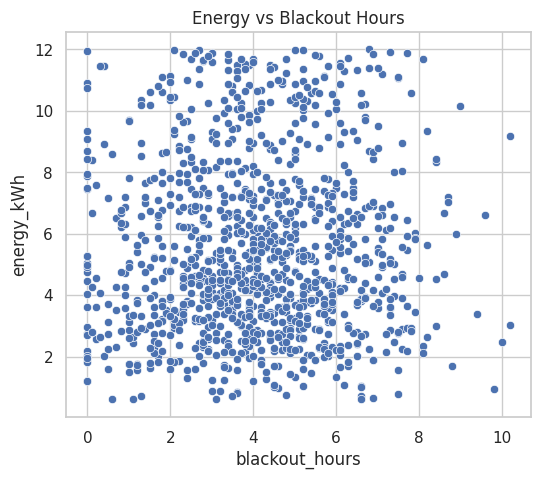

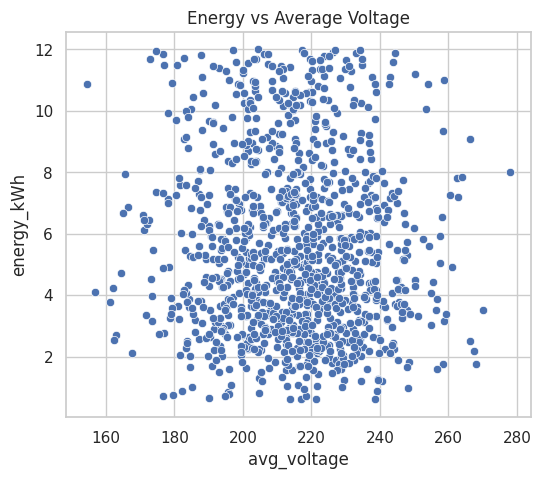

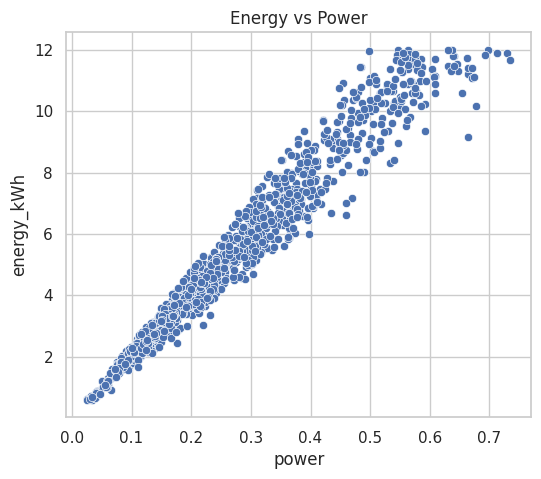

In [92]:
#  BIVARIATE ANALYSIS

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="blackout_hours", y="energy_kWh")
plt.title("Energy vs Blackout Hours")
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="avg_voltage", y="energy_kWh")
plt.title("Energy vs Average Voltage")
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="power", y="energy_kWh")
plt.title("Energy vs Power")
plt.show()

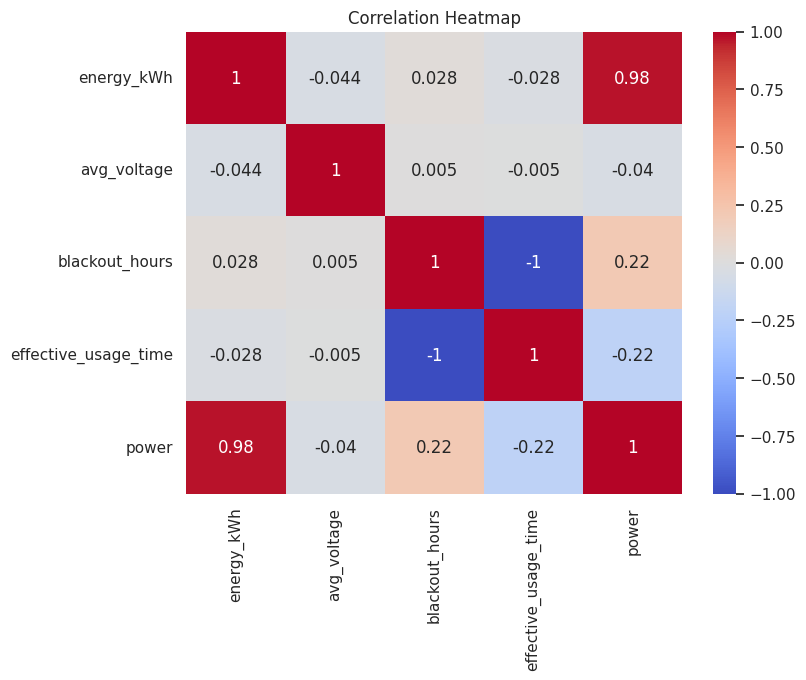

In [93]:
# CORRELATION HEATMAP

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

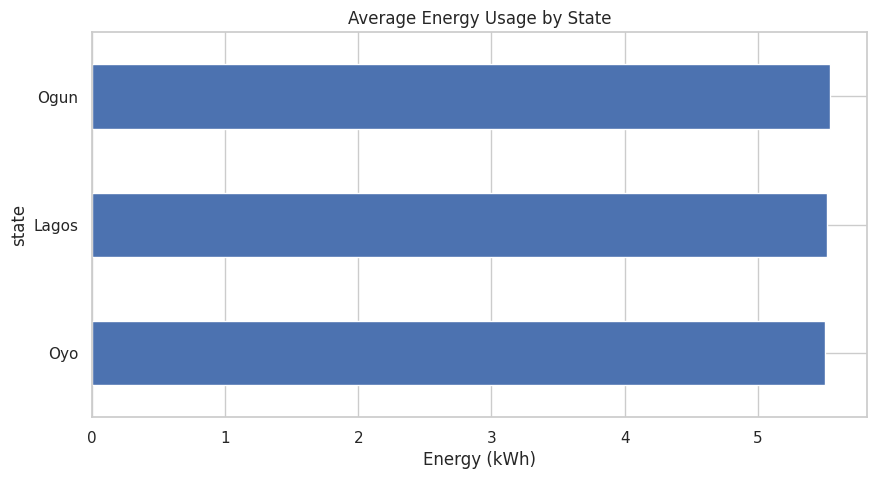

In [94]:
# STATE / COMMUNITY LEVEL ANALYSIS


# Average energy usage by state
state_energy = df.groupby("state")["energy_kWh"].mean().sort_values()

plt.figure(figsize=(10, 5))
state_energy.plot(kind="barh")
plt.title("Average Energy Usage by State")
plt.xlabel("Energy (kWh)")
plt.show()

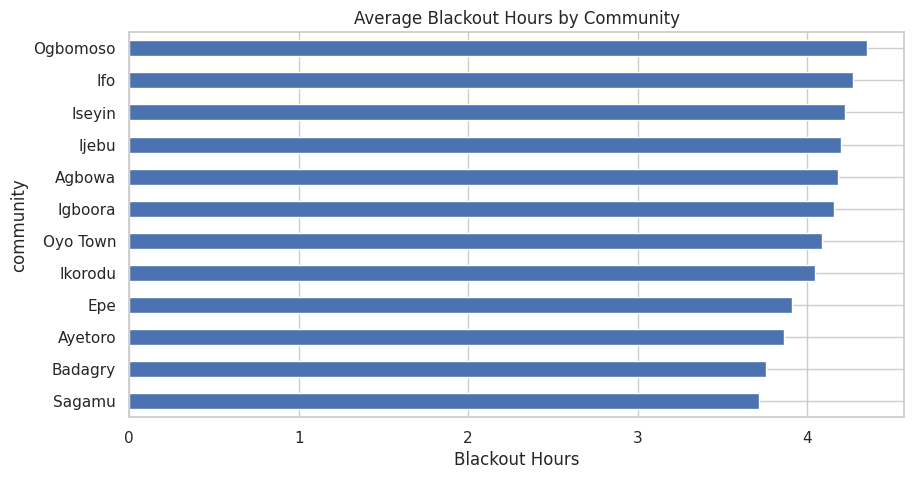

In [95]:
# Average blackout hours by community
community_blackouts = df.groupby("community")["blackout_hours"].mean().sort_values()

plt.figure(figsize=(10, 5))
community_blackouts.plot(kind="barh")
plt.title("Average Blackout Hours by Community")
plt.xlabel("Blackout Hours")
plt.show()

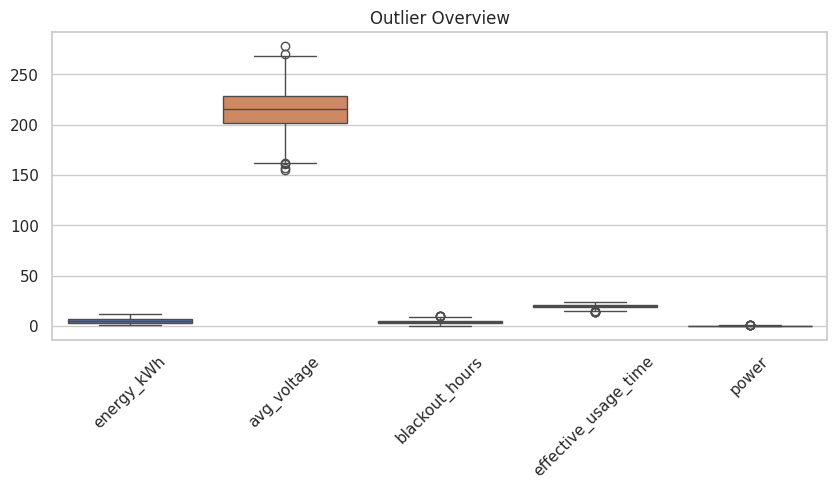


 EDA Completed Successfully!


In [96]:
# OUTLIER DETECTION

plt.figure(figsize=(10, 4))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Overview")
plt.show()


print("\n EDA Completed Successfully!")